<h1>Introduction to Neural Networks Applications</h1>

In [1]:
# libraries
import numpy as np 
import cv2

In [2]:
# backend NN XOR
X = np.array((
    [0, 0, 0],
    [0, 0, 1],
    [0, 1, 0],
    [0, 1, 1],
    [1, 0, 0],
    [1, 0, 1],
    [1, 1, 0],
    [1, 1, 1],
),  dtype = float)
y = np.array(([0], [1], [1], [0], [1], [0], [0], [1]), dtype = float)

In [3]:
loss_file = open("sum_errors_squared.csv", "w")

In [4]:
class NN:
    def __init__(self):
        self.input_layer_size = 3
        self.hidden_layer_size = 4
        self.output_layer_size = 1
        self.W1 = np.random.randn(self.input_layer_size, self.hidden_layer_size)
        self.W2 = np.random.randn(self.hidden_layer_size, self.output_layer_size)
    
    def feed_forward(self, X):
        self.z1 = np.dot(X, self.W1) 
        self.z2 = self.sigmoid(self.z1)
        self.z3 = np.dot(self.z2, self.W2)
        o = self.sigmoid(self.z3)
        return o
        
    def backward_propagation(self, X, y, o):
        self.o_error = y - o
        self.o_delta = self.o_error * self.sigmoid_derivate(o)
        self.z2_error = self.o_delta.dot(self.W2.T)
        self.z2_delta = self.z2_error * self.sigmoid_derivate(self.z2)
        # adjust the hidden layer
        self.W1 += X.T.dot(self.z2_delta)
        self.W2 += self.z2.T.dot(self.o_delta)

    def train(self, X, y):
        o = self.feed_forward(X)
        self.backward_propagation(X, y, o)
        

    def sigmoid(self, s):
        return 1 / (1 + np.exp(-s))
    
    def sigmoid_derivate(self, s):
        return (1 - s) * s
    
    def save_sum_squared_errors(self, i, error):
        loss_file.write(str(i) + "," + str(error.tolist()) + "\n")

    def save_weights(self):
        np.savetxt("WeightsLayer1.txt", self.W1, fmt = "%s")
        np.savetxt("WeightsLayer2.txt", self.W2, fmt = "%s")

    def predict_exit(self):
        print("Prediction for function XOR after weights training:" )
        print("Real: \n" + str(y_predicted))
        print("Predicted: \n" + str(self.feed_forward(y_predicted)))


In [5]:
neural_network = NN()
nr_epochs = 2000

# training
for i in range(nr_epochs):
    print("Epoch " + str(i) + "\n")
    print("Features: \n" + str(X))
    print("Real Targets for XOR: \n" + str(y))
    print("Predicted label for XOR: \n" + str(neural_network.feed_forward(X)))
    loss = np.mean(np.square(y - neural_network.feed_forward(X)))
    neural_network.save_sum_squared_errors(i, loss)
    print("Squared Error Sum: \n" + str(loss))
    print("\n")
    neural_network.train(X, y)
    neural_network.save_weights()


Epoch 0

Features: 
[[0. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 1.]
 [1. 0. 0.]
 [1. 0. 1.]
 [1. 1. 0.]
 [1. 1. 1.]]
Real Targets for XOR: 
[[0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]]
Predicted label for XOR: 
[[0.16107321]
 [0.04381385]
 [0.17461177]
 [0.10390298]
 [0.10494243]
 [0.03350779]
 [0.09821142]
 [0.07011512]]
Squared Error Sum: 
0.41361003499785853


Epoch 1

Features: 
[[0. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 1.]
 [1. 0. 0.]
 [1. 0. 1.]
 [1. 1. 0.]
 [1. 1. 1.]]
Real Targets for XOR: 
[[0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]]
Predicted label for XOR: 
[[0.1982334 ]
 [0.06091829]
 [0.23000139]
 [0.14476916]
 [0.13326349]
 [0.046757  ]
 [0.12856535]
 [0.09416292]]
Squared Error Sum: 
0.39068939564494587


Epoch 2

Features: 
[[0. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 1.]
 [1. 0. 0.]
 [1. 0. 1.]
 [1. 1. 0.]
 [1. 1. 1.]]
Real Targets for XOR: 
[[0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]]
Predicted label for XOR: 
[[0.24817219]
 [0.08814522]
 [0.30640912]
 [0

In [6]:
# predict on test data
y_predicted = np.array([1, 1, 1], dtype = float)
neural_network.predict_exit()

Prediction for function XOR after weights training:
Real: 
[1. 1. 1.]
Predicted: 
[0.99998327]


In [34]:
# working with tensorflow keras model

import tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 
from tensorflow.keras.regularizers import l1, l2, l1_l2

In [8]:
# load dataset
(X_train, y_train), (X_test, y_test) = tensorflow.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [9]:
# size of X_test
len(X_test)

10000

In [10]:
# pixels
X_train[0].shape

(28, 28)

In [11]:
# normalize data
X_train = X_train / 255
X_test = X_test / 255

In [12]:
X_train.shape

(60000, 28, 28)

In [13]:
# reshape to 784
X_train_flattened = X_train.reshape(len(X_train), 28 * 28)

In [14]:
X_train_flattened.shape # done

(60000, 784)

In [15]:
# reshape to 784
X_test_flattened = X_test.reshape(len(X_test), 28 * 28)

In [16]:
X_test_flattened.shape # done

(10000, 784)

In [17]:
model = Sequential([
    Dense(128, input_shape = (784,), activation = 'relu'),
    Dense(32, activation = 'relu'),
    Dense(64, activation = 'relu'),
    Dense(32, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 64)                2112      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 10)                330       
                                                                 
Total params: 109130 (426.29 KB)
Trainable params: 109130 (426.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
history = model.fit(X_train_flattened, y_train, epochs = 25, validation_data = (X_test_flattened, y_test))

Epoch 1/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2705 - accuracy: 0.9201 - val_loss: 0.1293 - val_accuracy: 0.9587
Epoch 2/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1107 - accuracy: 0.9668 - val_loss: 0.1199 - val_accuracy: 0.9652
Epoch 3/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0800 - accuracy: 0.9750 - val_loss: 0.0953 - val_accuracy: 0.9721
Epoch 4/25
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0642 - accuracy: 0.9796 - val_loss: 0.0923 - val_accuracy: 0.9732
Epoch 5/25
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0528 - accuracy: 0.9835 - val_loss: 0.1004 - val_accuracy: 0.9726
Epoch 6/25
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0449 - accuracy: 0.9856 - val_loss: 0.0884 - val_accuracy: 0.9759
Epoch 7/25
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0369 - accuracy: 0.9882 - val_loss: 0.0865 - val_accuracy:

In [19]:
# model evaluation
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 699us/step - loss: 0.1240 - accuracy: 0.9783


[0.12402109056711197, 0.9782999753952026]

In [22]:
# fashion mnist dataset
train = pd.read_csv('./fashion-mnist_train.csv')
test = pd.read_csv('./fashion-mnist_test.csv')
train.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
X_train = train.drop('label', axis = 1) / 255
y_train = train['label']

X_test = test.drop('label', axis = 1) / 255
y_test = test['label']

In [24]:
# reshape the data in 28x28 shape for plotting the images
X_train_reshape = X_train.values.reshape(-1, 28, 28)

In [25]:
# classess names
col_name = [' T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

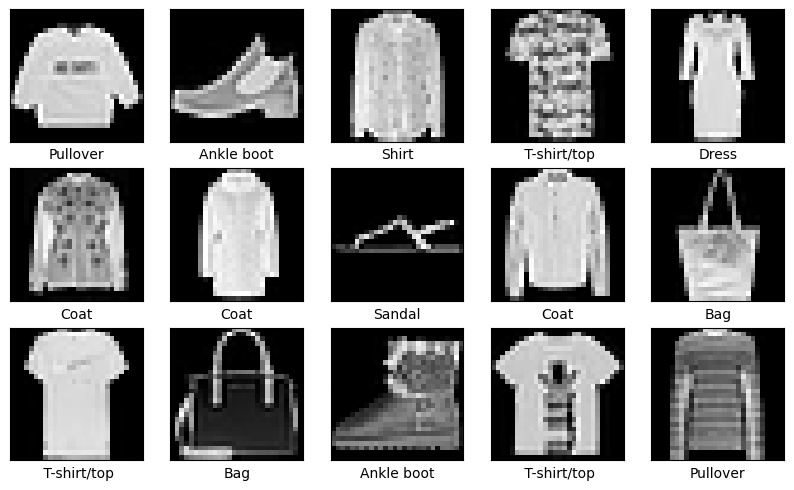

In [26]:
# display the images
plt.figure(figsize = (10, 10))
for i in range(15):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train_reshape[i], cmap = 'gray')
    plt.xlabel(col_name[y_train[i]])

In [27]:
# model arhitecture
model = Sequential([
    Dense(128, input_shape= (784,), activation = 'relu'),
    Dense(24, activation = 'relu'),
    Dropout(0.4),
    Dense(10, activation = 'softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 128)               100480    
                                                                 
 dense_6 (Dense)             (None, 24)                3096      
                                                                 
 dropout (Dropout)           (None, 24)                0         
                                                                 
 dense_7 (Dense)             (None, 10)                250       
                                                                 
Total params: 103826 (405.57 KB)
Trainable params: 103826 (405.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
# compile the model
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [29]:
history = model.fit(X_train, y_train, epochs = 50, validation_data = (X_test, y_test))

Epoch 1/50


2024-12-19 14:34:50.627572: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 376320000 exceeds 10% of free system memory.


1875/1875 [==============================] - 4s 2ms/step - loss: 0.7218 - accuracy: 0.7447 - val_loss: 0.4224 - val_accuracy: 0.8462
Epoch 2/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5138 - accuracy: 0.8188 - val_loss: 0.3958 - val_accuracy: 0.8568
Epoch 3/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4586 - accuracy: 0.8405 - val_loss: 0.3633 - val_accuracy: 0.8703
Epoch 4/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4329 - accuracy: 0.8487 - val_loss: 0.3475 - val_accuracy: 0.8720
Epoch 5/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4128 - accuracy: 0.8557 - val_loss: 0.3339 - val_accuracy: 0.8790
Epoch 6/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3961 - accuracy: 0.8618 - val_loss: 0.3532 - val_accuracy: 0.8739
Epoch 7/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3792 - accuracy: 0.8677 - val_loss: 0.3260 - val_accuracy: 0.8845
Epo

In [30]:
# extract the accuracy and loss
acc = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

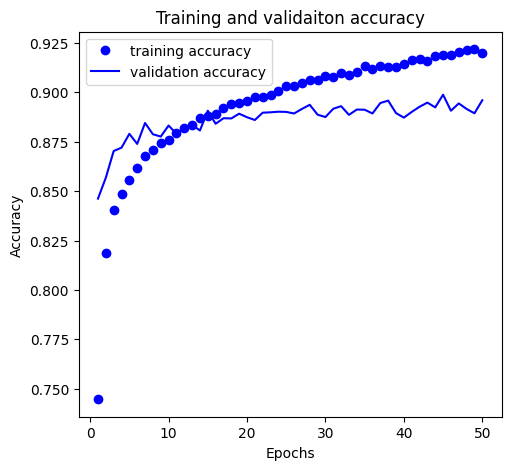

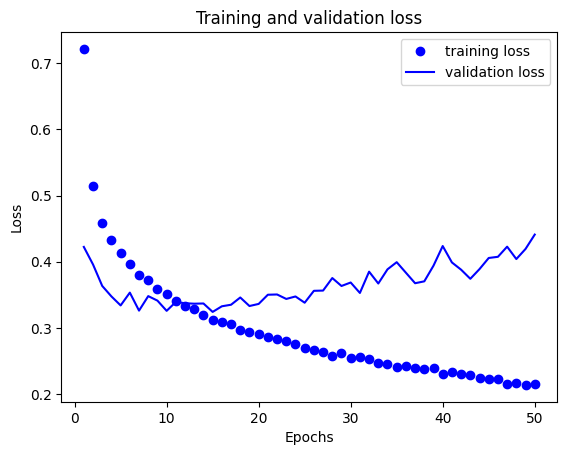

In [31]:
# data numerical graphs accuracy & loss
plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label = 'training accuracy')
plt.plot(epochs, validation_accuracy, 'b', label = 'validation accuracy')
plt.title('Training and validaiton accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, 'bo', label = 'training loss')
plt.plot(epochs, val_loss, 'b', label = 'validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

313/313 [==============================] - 0s 656us/step


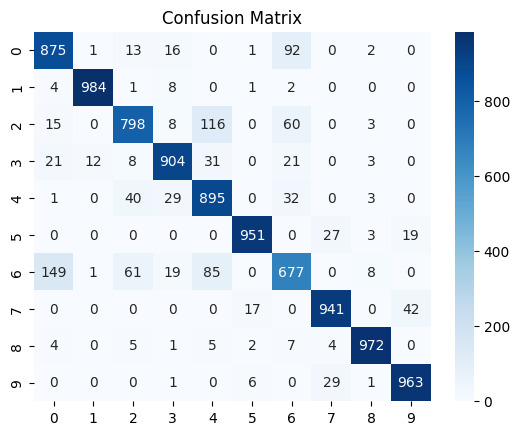

In [32]:
# confusion matrix
y_predict = model.predict(X_test)
y_predict = np.argmax(y_predict, axis = 1)
conf_matrix = confusion_matrix(y_test, y_predict)
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Blues')
plt.title('Confusion Matrix')
plt.show()

In [35]:
# regularization l1 and l2
model_reg = Sequential([
    Dense(128, activation = 'relu', input_shape = (784,), kernel_regularizer = l1_l2(l1 = 0.001, l2 = 0.001)),
    Dropout(0.2),
    Dense(10, activation = 'softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 128)               100480    
                                                                 
 dense_6 (Dense)             (None, 24)                3096      
                                                                 
 dropout (Dropout)           (None, 24)                0         
                                                                 
 dense_7 (Dense)             (None, 10)                250       
                                                                 
Total params: 103826 (405.57 KB)
Trainable params: 103826 (405.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [36]:
# compile the model
model_reg.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [37]:
# train the model
history = model_reg.fit(X_train, y_train, epochs = 50, validation_data = (X_test, y_test))

Epoch 1/50


2024-12-19 14:39:39.578372: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 376320000 exceeds 10% of free system memory.


1875/1875 [==============================] - 4s 2ms/step - loss: 1.3232 - accuracy: 0.7599 - val_loss: 0.8923 - val_accuracy: 0.8050
Epoch 2/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.9054 - accuracy: 0.7844 - val_loss: 0.8137 - val_accuracy: 0.8140
Epoch 3/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8622 - accuracy: 0.7921 - val_loss: 0.8008 - val_accuracy: 0.8180
Epoch 4/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8419 - accuracy: 0.7951 - val_loss: 0.7912 - val_accuracy: 0.8098
Epoch 5/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8261 - accuracy: 0.7965 - val_loss: 0.7602 - val_accuracy: 0.8232
Epoch 6/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.8141 - accuracy: 0.7986 - val_loss: 0.7665 - val_accuracy: 0.8253
Epoch 7/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.8007 - accuracy: 0.8010 - val_loss: 0.7658 - val_accuracy: 0.8188
Epo

In [38]:
# extract the accuracy and loss
acc = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

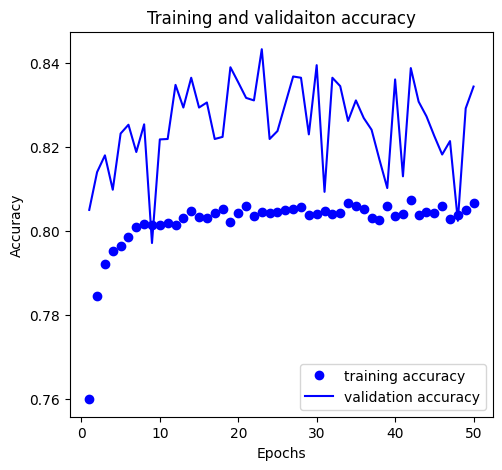

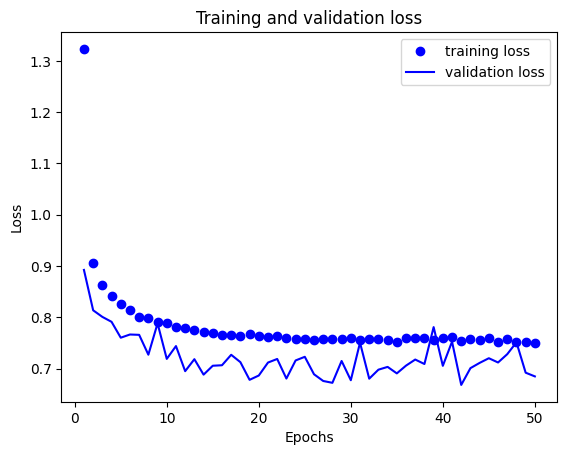

In [39]:
# data numerical graphs accuracy & loss
plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label = 'training accuracy')
plt.plot(epochs, validation_accuracy, 'b', label = 'validation accuracy')
plt.title('Training and validaiton accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, 'bo', label = 'training loss')
plt.plot(epochs, val_loss, 'b', label = 'validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

313/313 [==============================] - 0s 616us/step


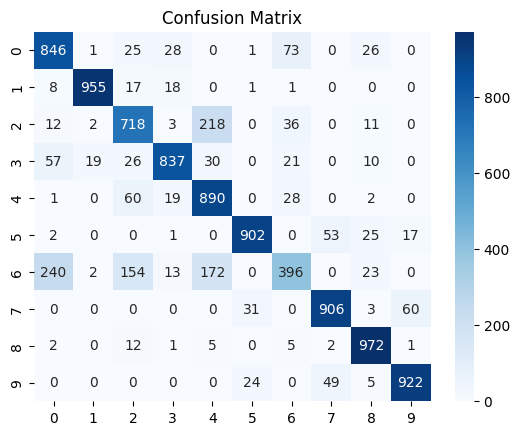

In [40]:
# confusion matrix
y_predict = model_reg.predict(X_test)
y_predict = np.argmax(y_predict, axis = 1)
conf_matrix = confusion_matrix(y_test, y_predict)
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Blues')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# homework => dropout, more layers, get a better accuracy, layers l1 and l2, alpha different, +1% on paper printed

In [41]:
# CNN

# load data
(X_train, y_train), (X_test, y_test) = tensorflow.keras.datasets.mnist.load_data()

# reshape
X_train = X_train.reshape(-1, 28, 28, 1) / 255.0
X_test = X_test.reshape(-1, 28, 28, 1) / 255.0

In [42]:
# model CNN
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation = 'relu'),
    Dense(10, activation = 'softmax')
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense_10 (Dense)            (None, 128)               692352    
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
                                                                 
Total params: 693962 (2.65 MB)
Trainable params: 693962 (2.65 MB)
Non-trainable params: 0 (0.00 Byte)
__________________